#**Bitcoin Price Monitoring System using Cryptocompare Website's API**
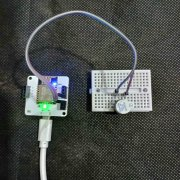 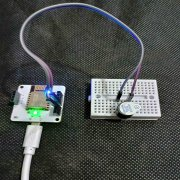

##**Things used in this project**
**Hardware components**
 * Bolt IoT Bolt WiFi Module
 * Piezoelectric buzzer
 * Jumper wires
 * Breadboard

**Software components**
 * Telegram Bot Credentials
 * Python

##**Story**
Bitcoin lets you exchange money and transact in a diffrent way and they should be given the same security as your wallet, or even more! The price of a bitcoin can unpredictably increase or decrease in a short period of time.
To be a successfull trader, being regularly updated about price changes is absolutely important because of the volatility of cryptocurrency markets.

So this projects lets you track the ever fluctuating bitcoin prices in the currency suitable to you, So there is no more need to check the website for bitcoin prices, you will be notified whenever there is an increase or decrease in the bitcoin market price with respect to the price specified by you.

##**Gathering all required components**
* Bolt WiFi Module
* Piezoelectric Buzzer
* Breadboard
* Wires

##**Installing BoltIoT library**

In [2]:
!pip install boltiot

##**Importing required libraries**

In [3]:
import requests                 # for making HTTP requests
import json, time
from boltiot import Bolt

##**Adding credentials of Bolt Module and Telegram Bot**

In [4]:
api_key = "XXXXXXXX-XXXX-XXXX-XXXX-XXXXXXXXXXXX"
device_id = "BOLTXXXXXXX"
mybolt=Bolt(api_key,device_id)

telegram_chat_id = "@XXXXXXXXXXXXXXXXXX"
telegram_bot_id = "botXXXXXXXXXX:XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
url = "https://api.telegram.org/" + telegram_bot_id + "/sendMessage"

In [5]:
split = mybolt.isOnline().split('"')
print(split)

['{', 'value', ': ', 'online', ', ', 'time', ': ', 'Tue 2024-08-20 14:49:08 UTC', ', ', 'success', ': 1}']


##**Bitcoin Price Monitoring Code**

In [6]:
if (split == 'offline'):
  print("Bolt Device is offline. Messages can only be send to your telegram.")

print("In which currency did you want to enter selling price ?")
print("Enter 1 for USD")
print("Enter 2 for JPY")
print("Enter 3 for EUR")

user = input("Enter here: ")
fetched_data = [ ]
match user:
  case '1':
  # Deciding Selling price of Bitcoin in USD
    selling_price = float(input("Enter the selling price of bitcoin in USD: "))
    while(True):
      print ("Fetching the price")
      URL = "https://min-api.cryptocompare.com/data/price?fsym=BTC&tsyms=USD,JPY,EUR"
      response = requests.request("GET", URL)
      response=json.loads(response.text)
      current_price_in_usd = response['USD']
      current_time = time.asctime().split(' ')[3]
      print("Current Bitcoin Price in USD = " +str(current_price_in_usd))
      fetched_data.append( [current_time , current_price_in_usd] )
      try:
        current_price_in_usd = response['USD']
        if (current_price_in_usd >= selling_price ):
          message = "The Current Bitcoin Price in USD is " +str(current_price_in_usd)
          data = { "chat_id": telegram_chat_id, "text": message }
          response = requests.request( "POST", url, params=data )
          mybolt.digitalWrite("0","HIGH")
          time.sleep(5)
          mybolt.digitalWrite("0","LOW")
          print("This is the Telegram URL")
          print(url)
          print("This is the Telegram response")
          print(response.text)
          telegram_data = json.loads(response.text)
          telegram_status = telegram_data["ok"]
          print("This is the Telegram status:", telegram_status)
      except Exception as e:
          print ("Error occured: Below are the details")
          print (e)
      time.sleep(10)
  case '2':
    # Deciding Selling price of Bitcoin in JPY
    selling_price = float(input("Enter the selling price of bitcoin in JPY: "))
    while(True):
      print ("Fetching the price")
      URL = "https://min-api.cryptocompare.com/data/price?fsym=BTC&tsyms=USD,JPY,EUR"
      response = requests.request("GET", URL)
      response=json.loads(response.text)
      current_price_in_jpy = response['JPY']
      current_time = time.asctime().split(' ')[3]
      print("Current Bitcoin Price in JPY = " +str(current_price_in_jpy))
      fetched_data.append( [current_time , current_price_in_jpy] )
      try:
        current_price_in_jpy = response['JPY']
        if (current_price_in_jpy >= selling_price ):
          message = "The Current Bitcoin Price in JPY is " +str(current_price_in_jpy)
          data = { "chat_id": telegram_chat_id, "text": message }
          response = requests.request( "POST", url, params=data )
          mybolt.digitalWrite("0","HIGH")
          time.sleep(5)
          mybolt.digitalWrite("0","LOW")
          print("This is the Telegram URL")
          print(url)
          print("This is the Telegram response")
          print(response.text)
          telegram_data = json.loads(response.text)
          telegram_status = telegram_data["ok"]
          print("This is the Telegram status:", telegram_status)
      except Exception as e:
          print ("Error occured: Below are the details")
          print (e)
      time.sleep(10)
  case '3':
    # Deciding Selling price of Bitcoin in EUR
    selling_price = float(input("Enter the selling price of bitcoin in EUR: "))
    while(True):
      print ("Fetching the price")
      URL = "https://min-api.cryptocompare.com/data/price?fsym=BTC&tsyms=USD,JPY,EUR"
      response = requests.request("GET", URL)
      response=json.loads(response.text)
      current_price_in_eur = response['EUR']
      current_time = time.asctime().split(' ')[3]
      print("Current Bitcoin Price in JPY = " +str(current_price_in_eur))
      fetched_data.append( [current_time , current_price_in_eur] )
      try:
        current_price_in_jpy = response['EUR']
        if (current_price_in_eur >= selling_price ):
          message = "The Current Bitcoin Price in EUR is " +str(current_price_in_eur)
          data = { "chat_id": telegram_chat_id, "text": message }
          response = requests.request( "POST", url, params=data )
          mybolt.digitalWrite("0","HIGH")
          time.sleep(5)
          mybolt.digitalWrite("0","LOW")
          print("This is the Telegram URL")
          print(url)
          print("This is the Telegram response")
          print(response.text)
          telegram_data = json.loads(response.text)
          telegram_status = telegram_data["ok"]
          print("This is the Telegram status:", telegram_status)
      except Exception as e:
          print ("Error occured: Below are the details")
          print (e)
      time.sleep(10)
  case _ :
    "Invalid input"
    exit()

In which currency did you want to enter selling price ?
Enter 1 for USD
Enter 2 for JPY
Enter 3 for EUR
Enter here: 1
Enter the selling price of bitcoin in USD: 59700
Fetching the price
Current Bitcoin Price in USD = 59745.17
This is the Telegram URL
https://api.telegram.org/botXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX/sendMessage
This is the Telegram response
{"ok":true,"result":{"message_id":20,"sender_chat":{"id":-1002183612292,"title":"Bitcoin Price Alert","username":"Bitcoin Price Alert","type":"channel"},"chat":{"id":-1002183612292,"title":"Bitcoin Price Alert","username":"Bitcoin Price Alert","type":"channel"},"date":1724165397,"text":"The Current Bitcoin Price in USD is 59745.17"}}
This is the Telegram status: True
Fetching the price
Current Bitcoin Price in USD = 59742.84
This is the Telegram URL
https://api.telegram.org/botXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX/sendMessage
This is the Telegram response
{"ok":true,"result":{"message_id":21,"sender_chat":{"id":-100

##**Bitcoin Prices**

In [7]:
print(fetched_data)

[['14:49:56', 59745.17], ['14:50:14', 59742.84], ['14:50:32', 59708.15], ['14:50:51', 59688.24], ['14:51:01', 59688.74], ['14:51:11', 59672.33], ['14:51:22', 59671.47], ['14:51:33', 59667.37], ['14:51:43', 59647.79], ['14:51:53', 59636.97], ['14:52:06', 59605.84], ['14:52:17', 59610.23], ['14:52:27', 59532.61], ['14:52:38', 59568.57], ['14:52:48', 59587.76], ['14:52:58', 59603.89], ['14:53:09', 59613.26], ['14:53:19', 59689.49], ['14:53:30', 59725.92], ['14:53:48', 59692.93], ['14:53:58', 59680.11], ['14:54:08', 59676.18], ['14:54:19', 59640.4], ['14:54:29', 59655.45], ['14:54:40', 59658.45], ['14:54:50', 59665.54], ['14:55:00', 59622.43]]


##**Table of Prices**

In [8]:
import pandas as pd
df = pd.DataFrame( fetched_data,columns=['Time','Current Price'] )
df

,Time,Current Price
0,14:49:56,59745.17
1,14:50:14,59742.84
2,14:50:32,59708.15
3,14:50:51,59688.24
4,14:51:01,59688.74
5,14:51:11,59672.33
6,14:51:22,59671.47
7,14:51:33,59667.37
8,14:51:43,59647.79
9,14:51:53,59636.97


In [9]:
price_array = pd.Series(df['Current Price']).astype(float)

##**Plotting the graph**

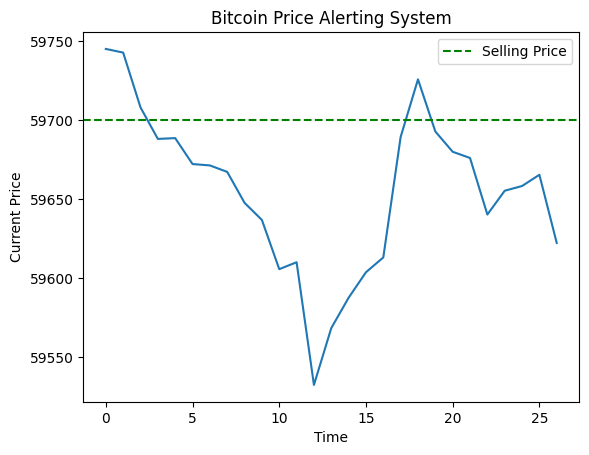

In [10]:
import matplotlib.pyplot as plt

plt.plot(price_array)

plt.axhline(y = selling_price , color = 'g', linestyle = '--', label = 'Selling Price')

plt.xlabel('Time')
plt.ylabel('Current Price')
plt.title('Bitcoin Price Alerting System')
plt.legend()

plt.show()

##**Alert on phone's telegram for current bitcoin price greater than selling price**

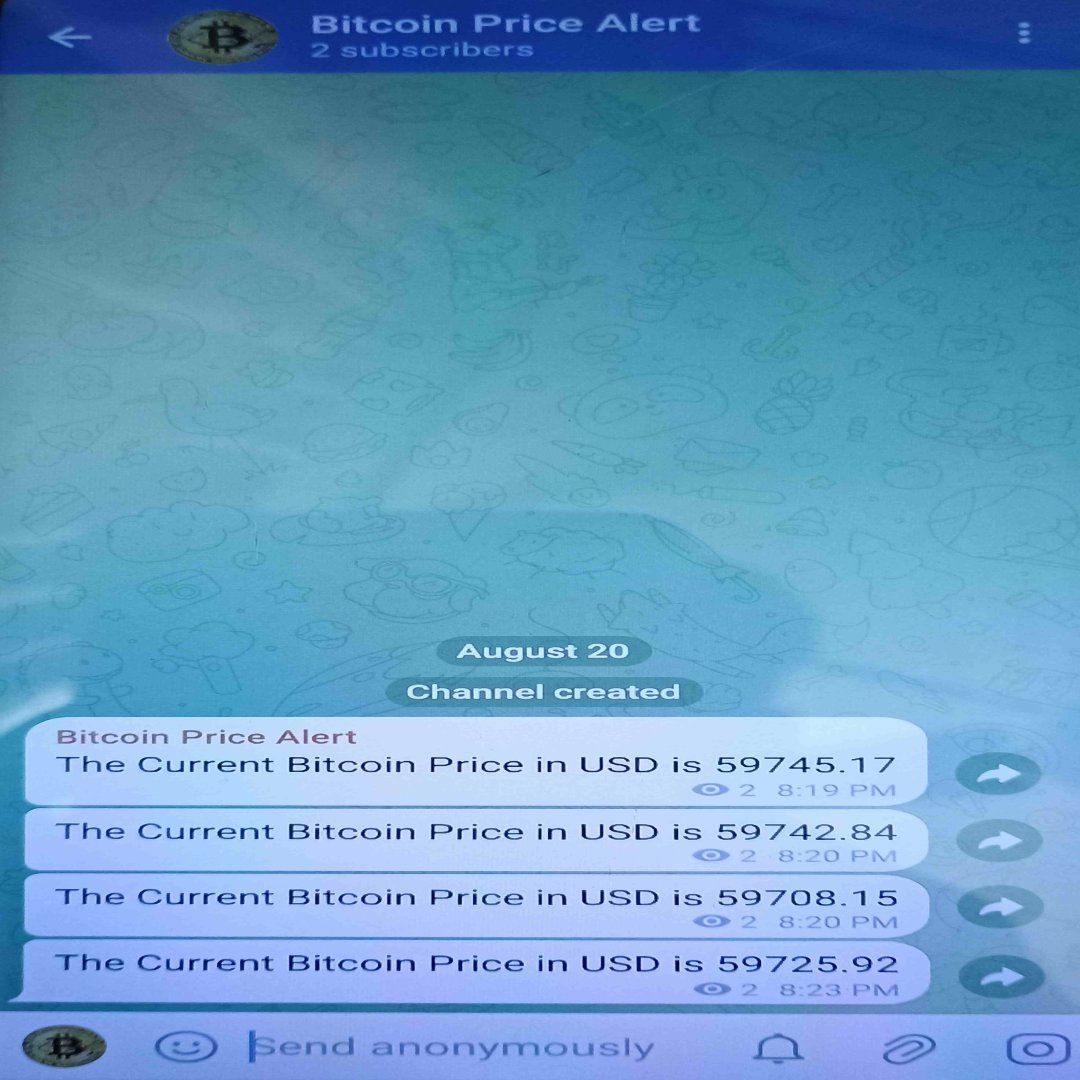